In [2]:
import os
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import re

In [3]:
BASE_PATH = 'D:/Data/KIMoDIs/global-groundwater-models-main'

DATA_PATH = os.path.join(BASE_PATH, 'data')
MODEL_PATH = os.path.join(BASE_PATH, 'models')
RESULT_PATH = os.path.join(BASE_PATH, 'results')

LAG = 52  # weeks
LEAD = 12  # weeks

# Roughly 80/10/10
TRAIN_PERIOD = (pd.Timestamp(1990, 1, 1), pd.Timestamp(2010, 1, 1))
VAL_PERIOD = (pd.Timestamp(2010, 1, 1), pd.Timestamp(2013, 1, 1))
TEST_PERIOD = (pd.Timestamp(2013, 1, 1), pd.Timestamp(2016, 1, 1))

TIME_IDX = pd.date_range(TRAIN_PERIOD[0], TEST_PERIOD[1], freq='W-SUN', inclusive='neither', name='time').to_frame().reset_index(drop=True)
TIME_IDX.index.name = 'time_idx'
TIME_IDX = TIME_IDX.reset_index()

In [4]:
train_df = pq.read_table(os.path.join(DATA_PATH, 'train_df.parquet'))
val_df = pq.read_table(os.path.join(DATA_PATH, 'val_df.parquet'))
test_df = pq.read_table(os.path.join(DATA_PATH, 'test_df.parquet'))

train_df = train_df.to_pandas()
val_df = val_df.to_pandas()
test_df = test_df.to_pandas()

In [5]:
id_test = test_df['proj_id'].unique()

train_df = train_df[train_df['proj_id'].isin(id_test)]
val_df = val_df[val_df['proj_id'].isin(id_test)]

In [6]:
# MOHP Visualisation
dsd_cols = [name for name in list(train_df) if re.match('eumohp_dsd.*', name)]
lp_cols = [name for name in list(train_df) if re.match('eumohp_lp.*', name)]
sd_cols = [name for name in list(train_df) if re.match('eumohp_sd.*', name)]

In [7]:
dsd_data = train_df[['proj_id'] + dsd_cols].drop_duplicates(subset=['proj_id'])
dsd_data.drop(columns=['proj_id']).describe().round(2)

,eumohp_dsd1,eumohp_dsd2,eumohp_dsd3,eumohp_dsd4,eumohp_dsd5
count,5308.00,5308.00,5308.00,5308.00,5308.00
mean,2015.45,4245.58,8764.44,15600.47,27429.82
std,1364.36,2514.71,5015.89,8538.88,14759.32
min,0.00,60.00,115.00,315.00,660.00
25%,1042.75,2456.75,4860.50,9441.00,15198.00
50%,1745.00,3815.00,7838.50,14521.50,26814.00
75%,2641.00,5617.50,11935.25,20448.00,38150.25
max,9875.00,17526.00,27900.00,46168.00,91103.00


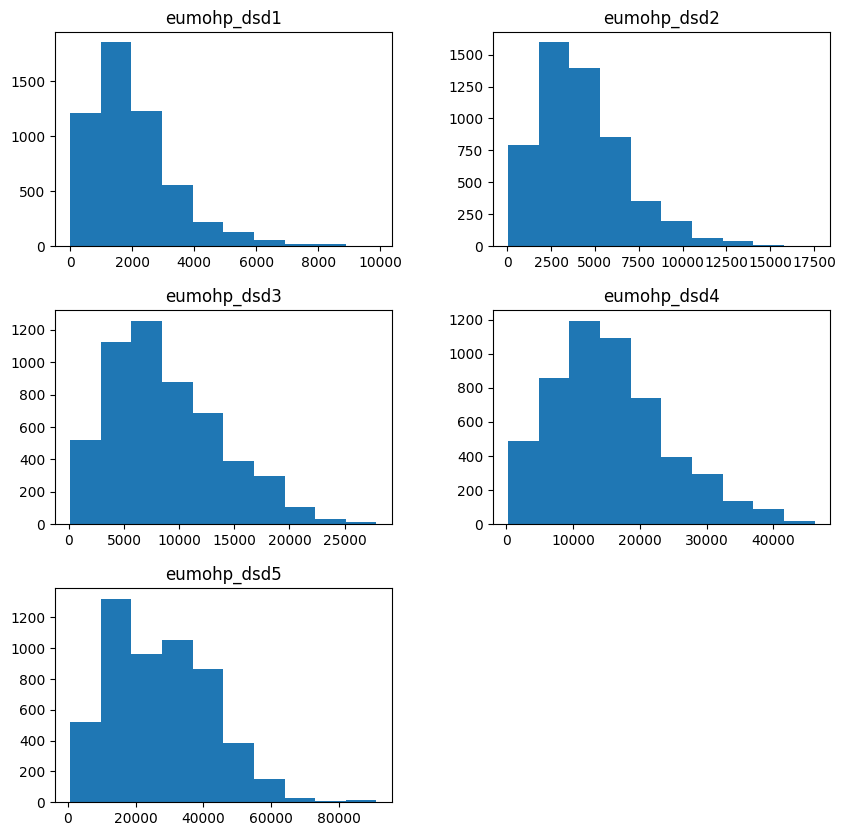

In [12]:
dsd_data.drop(columns=['proj_id']).hist(figsize=(10, 10), grid=False)  # Adjust the figsize as per your preference

# Save the plot as PNG
plt.savefig(os.path.join(BASE_PATH, 
                        'notebooks', 
                        'preprocessing',
                        'plots_global_gwm',
                        'plots',
                        'histogram_dsd.png'))

# Show the plot
plt.show()

In [9]:
lp_data = train_df[['proj_id'] + lp_cols].drop_duplicates(subset=['proj_id'])
lp_data.drop(columns=['proj_id']).describe().round(2)

,eumohp_lp1,eumohp_lp2,eumohp_lp3,eumohp_lp4,eumohp_lp5
count,5308.00,5308.00,5308.00,5308.00,5308.00
mean,5033.84,5025.53,4775.76,4832.57,4570.41
std,3004.28,3010.24,3084.20,3056.29,3068.04
min,0.00,0.00,0.00,0.00,0.00
25%,2312.25,2303.00,1849.50,1985.00,1698.50
50%,5132.00,5095.00,4726.00,4850.00,4404.50
75%,7685.50,7672.50,7523.00,7557.75,7316.75
max,10000.00,10000.00,10000.00,10000.00,10000.00


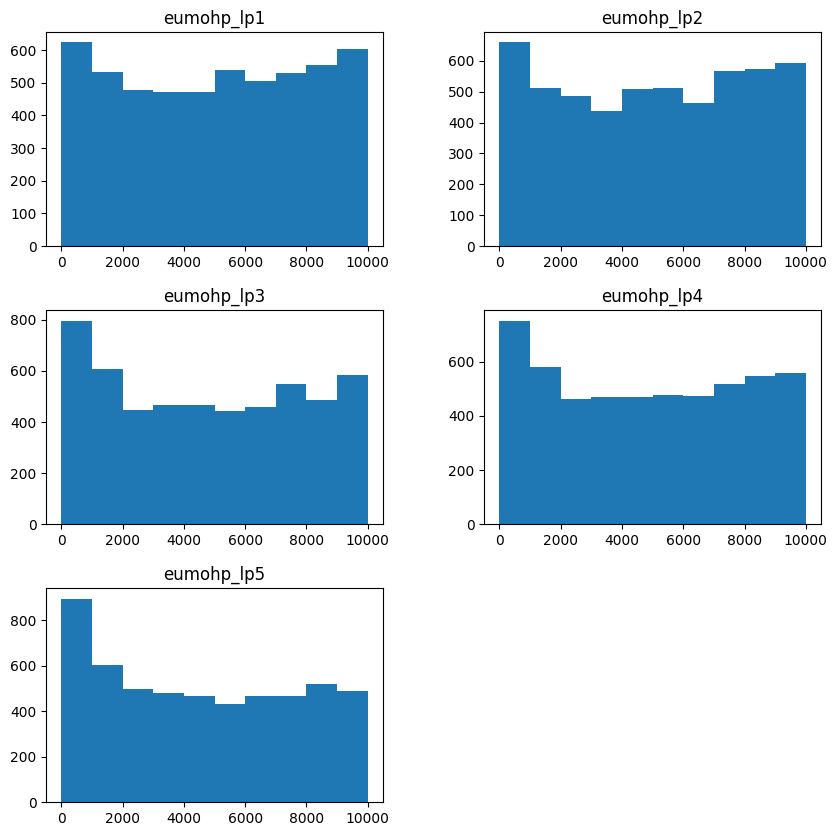

In [13]:
lp_data.drop(columns=['proj_id']).hist(figsize=(10, 10), grid=False)  # Adjust the figsize as per your preference

# Save the plot as PNG
plt.savefig(os.path.join(BASE_PATH, 
                        'notebooks', 
                        'preprocessing',
                        'plots_global_gwm',
                        'plots',
                        'histogram_lp.png'))

# Show the plot
plt.show()

In [11]:
sd_data = train_df[['proj_id'] + sd_cols].drop_duplicates(subset=['proj_id'])
sd_data.drop(columns=['proj_id']).describe().round(2)

,eumohp_sd1,eumohp_sd2,eumohp_sd3,eumohp_sd4,eumohp_sd5
count,5308.00,5308.00,5308.00,5308.00,5308.00
mean,1022.87,2155.10,4199.85,7651.81,12321.09
std,1027.13,1973.56,3988.28,7007.37,11351.64
min,0.00,0.00,0.00,0.00,0.00
25%,277.00,626.00,1075.00,2007.25,3262.25
50%,720.00,1590.00,2974.00,5620.00,9010.00
75%,1426.00,3140.50,6180.00,11398.25,18205.50
max,9263.00,11951.00,21486.00,38519.00,58500.00


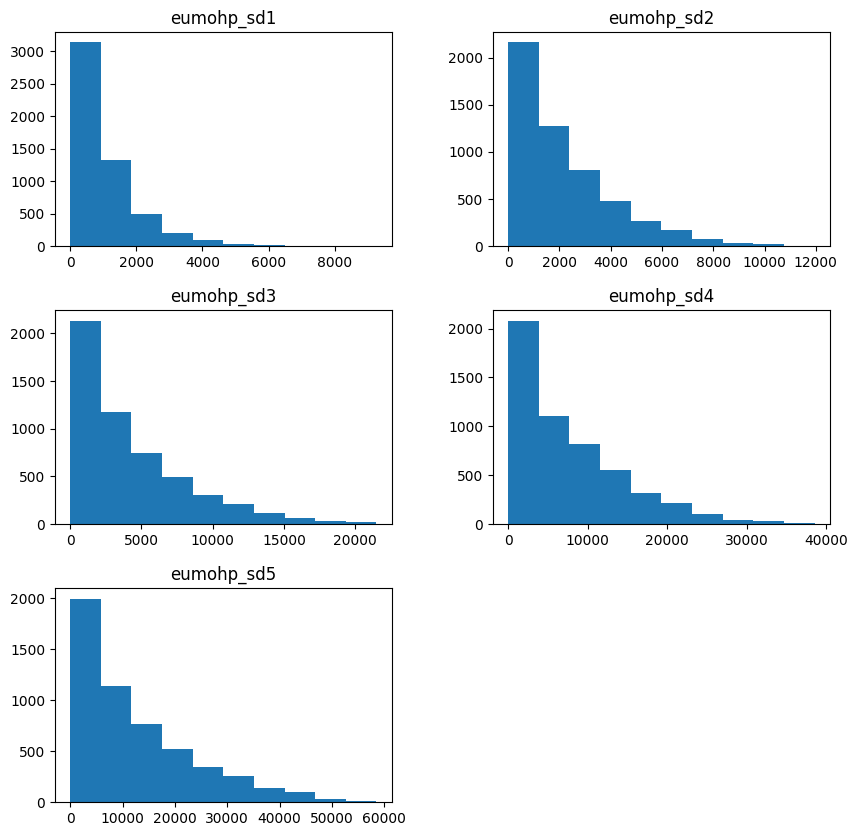

In [14]:
sd_data.drop(columns=['proj_id']).hist(figsize=(10, 10), grid=False)  # Adjust the figsize as per your preference

# Save the plot as PNG
plt.savefig(os.path.join(BASE_PATH, 
                        'notebooks', 
                        'preprocessing',
                        'plots_global_gwm',
                        'plots',
                        'histogram_sd.png'))

# Show the plot
plt.show()